<a href="https://colab.research.google.com/github/sebdavid3/Data-Structures-2/blob/main/divide_and_conquer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# LABORATORIO 2


Judith Perez Conde - Oskleiderbeth Vasquez Vasquez - Neslon Diaz Pizarro - Kevin Torregrosa

# Problema de los puntos más cercanos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

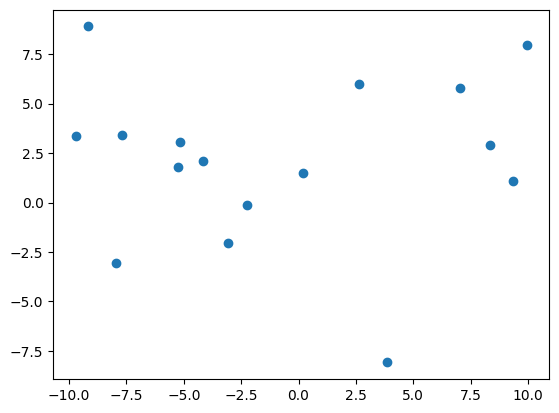

In [ ]:
x_min = -10
x_max = 10
y_min = -10
y_max = 10
points = 16

x = np.random.uniform(x_min, x_max, points)
y = np.random.uniform(y_min, y_max, points)

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [ ]:
def lowest_distance_points(x, y, min_distance=np.inf):
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    if len(x) == 2:
        distance = np.sqrt((x[0] - x[1])**2 + (y[0] - y[1])**2)
        return x, y, min(distance, min_distance)
    elif len(x) == 3:
        left_distance = np.sqrt((x[0] - x[1])**2 + (y[0] - y[1])**2)
        right_distance = np.sqrt((x[1] - x[2])**2 + (y[1] - y[2])**2)
        distance = min(left_distance, right_distance)
        if left_distance < right_distance:
            return x[:2], y[:2], distance
        else:
            return x[1:], y[1:], distance
    else:
        x_min, y_min = 0, 0
        median_x = np.median(x)
        x_1 = x[x < median_x]
        x_2 = x[x >= median_x]
        y_1 = y[x < median_x]
        y_2 = y[x >= median_x]
        in_between_distance = np.sqrt((x_1[-1] - x_2[0])**2 + (y_1[-1] - y_2[0])**2)
        if in_between_distance < min_distance:
            min_distance = in_between_distance
            x_min, y_min = [x_1[-1], x_2[0]], [y_1[-1], y_2[0]]
        x_left, y_left, left_distance = lowest_distance_points(x_1, y_1, min_distance=min_distance)
        if left_distance < min_distance:
            min_distance = left_distance
            x_min, y_min, min_distance = x_left, y_left, left_distance
        x_right, y_right, right_distance = lowest_distance_points(x_2, y_2, min_distance=min_distance)
        if right_distance < min_distance:
            min_distance = right_distance
            x_min, y_min, min_distance = x_right, y_right, right_distance
        return x_min, y_min, min_distance

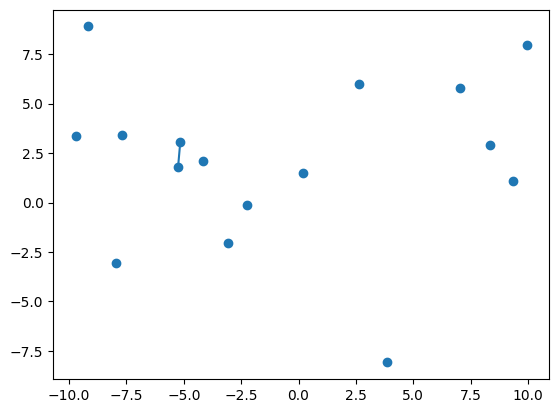

In [ ]:
min_x, min_y, min_distance = lowest_distance_points(x, y)

plt.scatter(x, y)
plt.plot(min_x, min_y)
plt.show()

## Cálculo de la complejidad del algoritmo

## Cálculo manual

Asumiendo valores constantes para las operaciones matemáticas como multiplicación y suma, el algoritmo se ve de esta forma:

\begin{align}
    T(n) = \left\{ \begin{array}{cl}
    2T(n/2) + n + 10 & , \ x > 2 \\
    4 & , \ x = 2
    \end{array} \right.
\end{align}

$2T(n/2)$ se debe a que se dividen los puntos en dos grupos de la mitad del tamaño, dos veces (lado izquierdo y lado derecho). $n$ es la complejidad de hallar la mediana.

Resolviendo para hallar la complejidad, hacemos:
\begin{align}
    \begin{array}{cl}
    T(n) &= 2T(n/2) + n + 10 \\
    &= 2( 2T(n/2^2) + n/2 + 10) + n + 10 \\
    &= 2^2T(n/2^2) + 2n + 2\cdot10 + 10 \\
    &= 2^2(T(n/2^3) + n/2^2 + 10) + 2n + 2\cdot10 + 10 \\
    &= 2^3T(n/2^3) + 3n + 2^2\cdot10 + 2\cdot10 + 10 \\
    &\vdots\\
    T(n) &= 2^iT(n/2^i) + in + 10\cdot\sum_{j=0}^{i-1} 2^j \\
    n/2^i = 2 &\to i = \log_2 n - 1 \\
    T(n) &= \frac{n}{2}\cdot4 + n(\log_2 n - 1) + 10 \cdot \frac{2^{i-1+1}-1}{2-1} \\
    T(n) &=  2n + n \log_2 n - n + 10(n/2 - 1) \\
    T(n) &= n \log_2 n + 6n - 10 \\
    T(n) &\in O(n \log_2 n)
    \end{array}
\end{align}


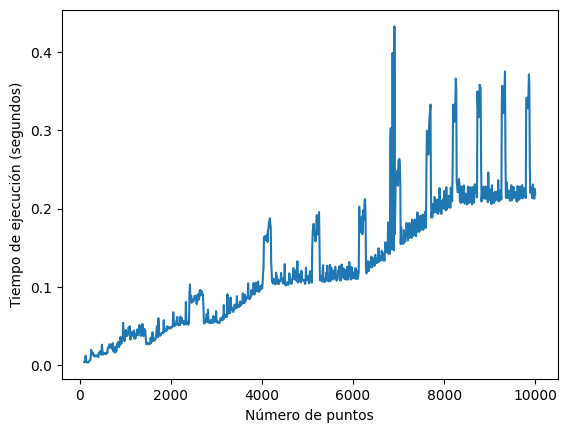

In [ ]:
import time

x_min = -10
x_max = 10
y_min = -10
y_max = 10

n = np.linspace(100, 10000, 1000)
t = []

for i in np.linspace(100, 10000, 1000):
    x = np.random.uniform(x_min, x_max, int(i))
    y = np.random.uniform(y_min, y_max, int(i))
    start = time.time()
    min_x, min_y, min_distance = lowest_distance_points(x, y)
    end = time.time()
    t.append(end - start)

plt.plot(n, t)
plt.xlabel("Número de puntos")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.show()

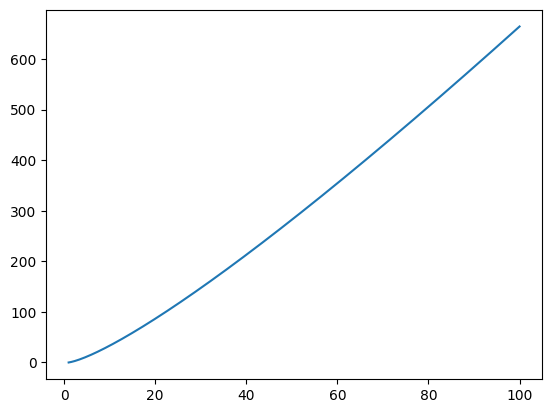

In [ ]:
def n_log_n(n):
    return n * np.log2(n)

n = np.linspace(1, 100, 500)
T = n_log_n(n)

plt.plot(n, T)
plt.show()

# Multiplicación de enteros grandes

In [ ]:
import time

def suma(a, b):
    return a + b

def desplaza_izq(a, n):
    return a * (10 ** n)

def multiplica(X, Y, profundidad=0):
    n = max(len(str(X)), len(str(Y)))

    if n == 1:
        print("  " * profundidad + f"Multiplicando {X} * {Y} = {X * Y}")
        return X * Y

    n2 = n // 2

    # Dividir X y Y
    xi = X // 10**n2
    xd = X % 10**n2
    yi = Y // 10**n2
    yd = Y % 10**n2

    print("  " * profundidad + f"Dividiendo: X = {X} en xi = {xi}, xd = {xd}")
    print("  " * profundidad + f"Dividiendo: Y = {Y} en yi = {yi}, yd = {yd}")

    # Multiplicaciones recursivas
    z1 = multiplica(xi, yi, profundidad + 1)
    z2 = multiplica(xi, yd, profundidad + 1)
    z3 = multiplica(xd, yi, profundidad + 1)
    z4 = multiplica(xd, yd, profundidad + 1)

    # Combinar resultados
    aux = suma(z2, z3)
    z1_shift = desplaza_izq(z1, 2 * n2)
    aux_shift = desplaza_izq(aux, n2)

    print("  " * profundidad + f"Combinando: z1 * 10^{2 * n2} = {z1_shift}")
    print("  " * profundidad + f"Combinando: (z2 + z3) * 10^{n2} = {aux_shift}")

    z = suma(z1_shift, aux_shift)
    z = suma(z, z4)

    print("  " * profundidad + f"Resultado parcial: {z}")

    return z

# Timepo de ejecucion
def ejecutar_multiplicacion(X, Y):
    inicio = time.time()
    resultado = multiplica(X, Y)
    fin = time.time()
    print(f"\nTiempo de ejecución: {fin - inicio:.6f} segundos")
    return resultado

# Ejemplo:
X = 1234567
Y = 24681135
print(f"Multiplicación de {X} y {Y}:\n")
resultado = ejecutar_multiplicacion(X, Y)
print(f"\nEl producto es: {resultado}")


Multiplicación de 1234567 y 24681135:

Dividiendo: X = 1234567 en xi = 123, xd = 4567
Dividiendo: Y = 24681135 en yi = 2468, yd = 1135
  Dividiendo: X = 123 en xi = 1, xd = 23
  Dividiendo: Y = 2468 en yi = 24, yd = 68
    Dividiendo: X = 1 en xi = 0, xd = 1
    Dividiendo: Y = 24 en yi = 2, yd = 4
      Multiplicando 0 * 2 = 0
      Multiplicando 0 * 4 = 0
      Multiplicando 1 * 2 = 2
      Multiplicando 1 * 4 = 4
    Combinando: z1 * 10^2 = 0
    Combinando: (z2 + z3) * 10^1 = 20
    Resultado parcial: 24
    Dividiendo: X = 1 en xi = 0, xd = 1
    Dividiendo: Y = 68 en yi = 6, yd = 8
      Multiplicando 0 * 6 = 0
      Multiplicando 0 * 8 = 0
      Multiplicando 1 * 6 = 6
      Multiplicando 1 * 8 = 8
    Combinando: z1 * 10^2 = 0
    Combinando: (z2 + z3) * 10^1 = 60
    Resultado parcial: 68
    Dividiendo: X = 23 en xi = 2, xd = 3
    Dividiendo: Y = 24 en yi = 2, yd = 4
      Multiplicando 2 * 2 = 4
      Multiplicando 2 * 4 = 8
      Multiplicando 3 * 2 = 6
      Multiplicando

## Solución de la Recurrencia

Usamos el teorema maestro para resolver la relación teniendo:
- \(a = 3\) (número de multiplicaciones)
- \(b = 2\) (reducción del tamaño)
- \(f(n) = O(n)\) (coste adicional)

Calculamos:
\begin{align*}
\log_b a &= \log_2 3 \approx 1.585
\end{align*}

Comparando \(f(n)\) con \(n^{\log_b a}\):
\begin{align*}
f(n) &= O(n) \quad \text{y} \quad n^{\log_b a} = O(n^{1.585})
\end{align*}

Como \(f(n)\) es polinómicamente menor que \(n^{\log_b a}\), por el teorema maestro, podemos concluir que:
\begin{align*}
T(n) &= \Theta(n^{\log_2 3}) \approx O(n^{1.585})
\end{align*}

Por lo tanto, el peso algorítmico nuestro algoritmo de multiplicación de numeros grandes o Karatsuba tiende a \(O(n^{1.585})\). Esto significa que, a medida que el tamaño de la entrada (el número de dígitos en los números a multiplicar) aumenta, el tiempo de ejecución del algoritmo crece más lentamente que el algoritmo de multiplicación estándar, que tiene una complejidad de \(O(n^2)\) que es el peso teorica y el nuestro el (O(n^{1.585})\) experimental.


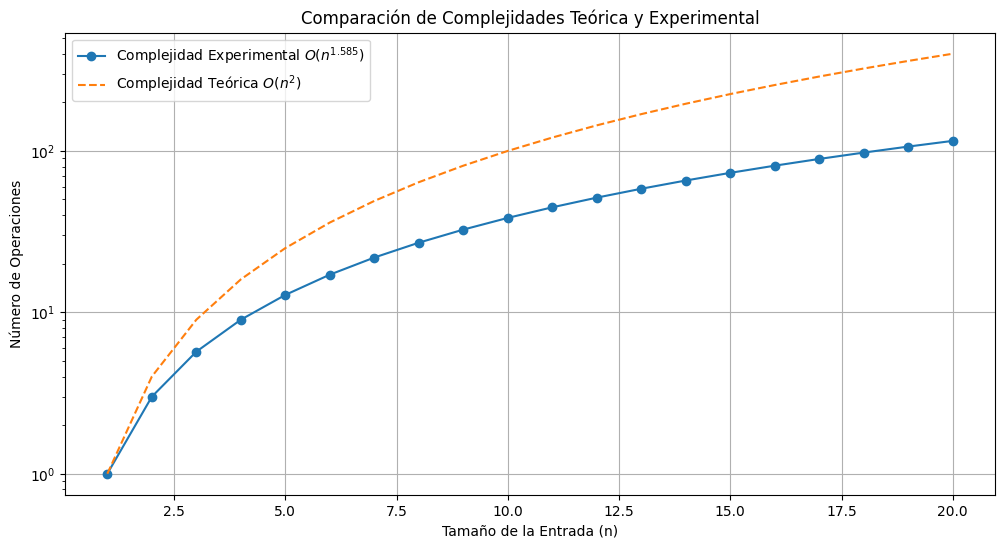

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Rango de tamaños n
n_values = np.arange(1, 21)

# Complejidad teórica O(n^2)
complejidad_teorica = n_values ** 2

# Complejidad experimental O(n^1.585)
complejidad_experimental = n_values ** 1.585

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(n_values, complejidad_experimental, label='Complejidad Experimental $O(n^{1.585})$', marker='o')
plt.plot(n_values, complejidad_teorica, label='Complejidad Teórica $O(n^2)$', linestyle='--')

# Configuración de la gráfica
plt.title('Comparación de Complejidades Teórica y Experimental')
plt.xlabel('Tamaño de la Entrada (n)')
plt.ylabel('Número de Operaciones')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.xscale('linear')
plt.show()

# Helecho

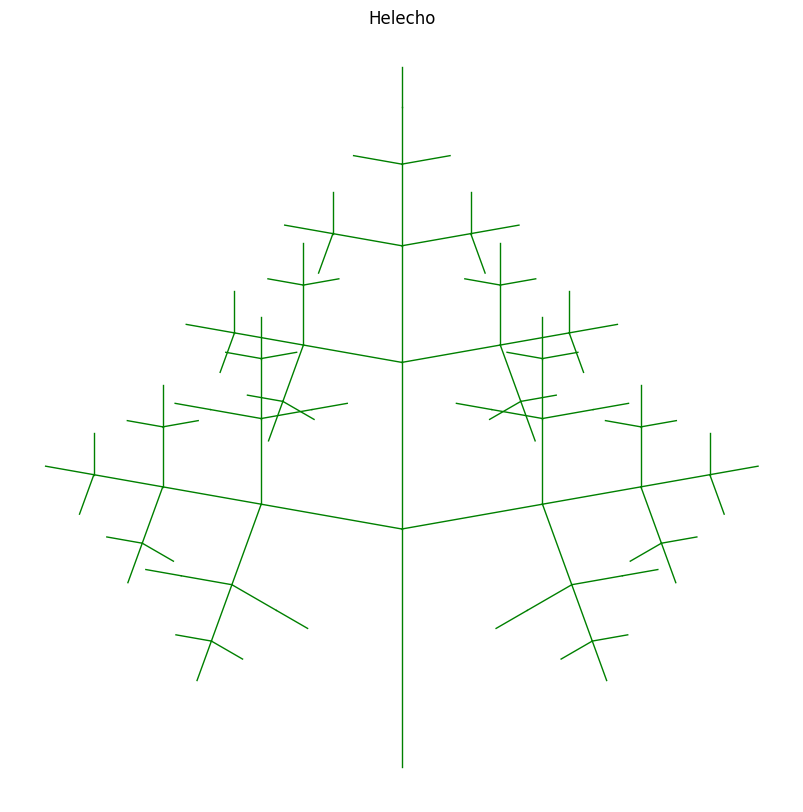

Tiempo de ejecución: 0.268692 segundos


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dibuja_linea(x1, y1, x2, y2):
    """Dibuja una línea entre los puntos (x1, y1) y (x2, y2) usando matplotlib."""
    plt.plot([x1, x2], [y1, y2], color='green', lw=1)

def pinta_helecho(x, y, ang, alt, nivel):
    """Dibuja un helecho con base en (x, y), ángulo ang y altura alt."""
    if alt < 15 or nivel == 0:  # Caso base: si la altura o el nivel es muy pequeño, detener.
        return

    # Calcular el punto final del tallo principal usando trigonometría.
    x2 = x + alt * np.cos(ang)
    y2 = y + alt * np.sin(ang)

    # Dibujar el tallo principal.
    dibuja_linea(x, y, x2, y2)

    # Llamadas recursivas para las tres ramas.

    # Rama izquierda con ángulo hacia la izquierda y altura reducida.
    pinta_helecho(x2, y2, ang + 4*np.pi / 9, alt * 0.6, nivel - 1)

    # Rama derecha con ángulo hacia la derecha y altura reducida.
    pinta_helecho(x2, y2, ang - 4*np.pi / 9, alt * 0.6, nivel - 1)

    # Rama central que sigue el mismo ángulo pero con altura reducida.
    pinta_helecho(x2, y2, ang, alt * 0.7, nivel - 1)


# Medir tiempo de ejecución
inicio = time.time()

plt.figure(figsize=(12, 10))
plt.title("Helecho")

pinta_helecho(0, 0, np.pi / 2, 100, 100)  # (x, y, ángulo, altura inicial, niveles de recursión)

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')  # Quita los ejes para que se vea más claro
plt.show()

fin = time.time()
print(f"Tiempo de ejecución: {fin - inicio:.6f} segundos")


## Peso Algoritmico por Teorema Maestro PINTA_HELECHO



\begin{align*}
T(altura) = 3T\left(altura - 1\right) + O(1)
\end{align*}

### Aplicando el Teorema Maestro
Por medio del teorema maestro se determinan estos parametros:

1. \(a = 3\), el número de llamadas recursivas.
2. \(b = 1\), ya que el problema no se reduce por un factor fijo de manera consistente.
3. El trabajo fuera de la recursión es constante, es decir, \(n^d = O(1)\), con \(d = 0\).

Ahora, comparamos \(a\) con \(b^d\) para determinar el caso del Teorema Maestro:
\begin{align*}
a = 3
\end{align*}

\begin{align*}
b^d = 1^0 = 1
\end{align*}
Por lo tanto, \begin{align*}(a > b^d)\end{align*}, lo que nos ubica en el **caso 1 del Teorema Maestro**, cuya solución es:

\begin{align*}
T(n) = O(a^n) = O(3^n)
\end{align*}

### Complejidad final

El algoritmo tiene una complejidad **exponencial** de \begin{align*}
T(n) = O(a^n) = O(3^n)
\end{align*}, lo que indica que el tiempo de ejecución crece rápidamente con el número de niveles debido a la naturaleza recursiva del problema, ya que por cada nivel se hace un llamado recursivo 3 veces.

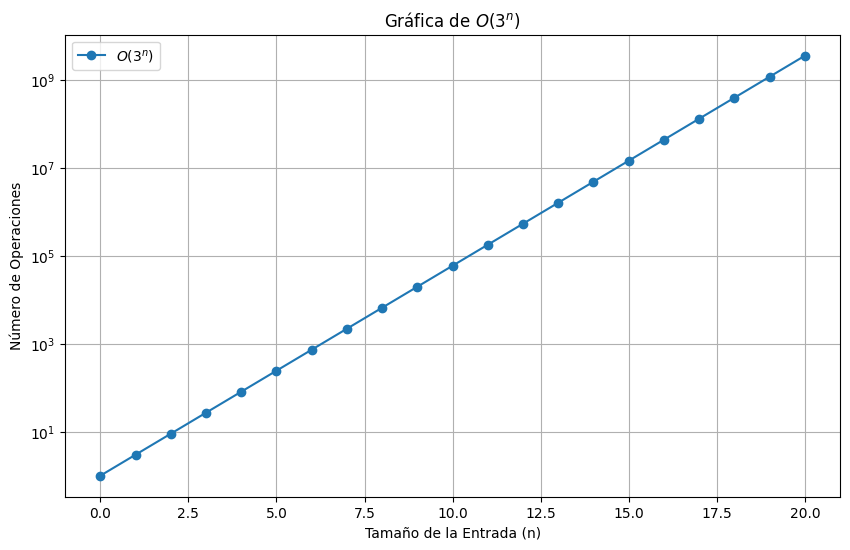

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Rango de tamaños n
n_values = np.arange(0, 21)

# Calcular 3^n
complejidad_exponencial = 3 ** n_values

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(n_values, complejidad_exponencial, label='$O(3^n)$', marker='o')

# Configuración de la gráfica
plt.title('Gráfica de $O(3^n)$')
plt.xlabel('Tamaño de la Entrada (n)')
plt.ylabel('Número de Operaciones')
plt.yscale('log')  # Usar escala logarítmica en el eje Y.
plt.grid(True)
plt.legend()
plt.show()


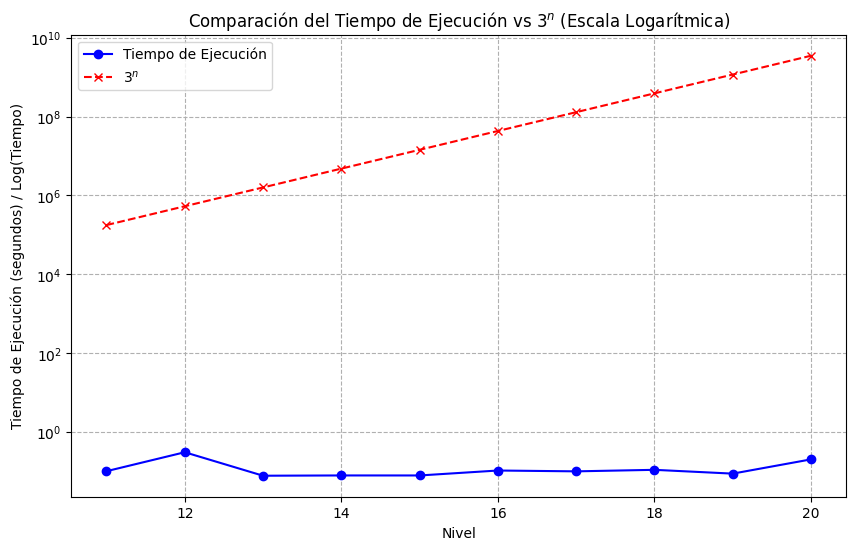

In [ ]:
# Medir los tiempos de ejecución para diferentes niveles
import random

niveles = range(11, 21)  # 20 niveles diferentes
alt = random.randint(100, 150)
tiempos_ejecucion = []
comparacion_3n = []
log_tiempos_ejecucion = []

for nivel in niveles:
    start_time = time.time()

    # Dibujar el helecho con el nivel actual
    plt.figure()
    pinta_helecho(0, 0, np.pi / 2, alt, nivel)
    plt.close()

    end_time = time.time()
    tiempo = end_time - start_time
    tiempos_ejecucion.append(tiempo)

    # Calcular el valor correspondiente a 3^nivel para comparación
    comparacion_3n.append(3 ** nivel)

# Graficar el comportamiento del tiempo de ejecución y su logaritmo
plt.figure(figsize=(10, 6))
plt.plot(niveles, tiempos_ejecucion, marker='o', linestyle='-', color='b', label='Tiempo de Ejecución')
plt.plot(niveles, comparacion_3n, marker='x', linestyle='--', color='r', label='$3^n$')
plt.yscale('log')  # Usar escala logarítmica en el eje y
plt.xlabel('Nivel')
plt.ylabel('Tiempo de Ejecución (segundos) / Log(Tiempo)')
plt.title('Comparación del Tiempo de Ejecución vs $3^n$ (Escala Logarítmica)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

**Consideraciones respecto a la grafica de comparación**

Hay que tener en cuenta que si los parametros como la altura y niveles del helecho varian de manera aleatoria la complejidadno tendra un comportamiento como el teorico, al considerar estos factores las grafica no alcanza a representar la complejidad.

### Comparación con la teorica

El algoritmo tiene una complejidad **exponencial** de \begin{align*}
T(n) = O(a^n) = O(3^n)
\end{align*} Asimismo, se condidera apropiada ya que los llamados recursivos por cada nivel son 3 y la cantidad de niveles determina la cantidad de veces que se ejecuta el código.